In [69]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Read the csv..
We have stock price data from 31/12/2014 till 31/12/2018... Lets see if we find any pattern in stock price trend...
There are multiple variables in the dataset – date, open, high, low, last, close, total_trade_quantity, and turnover.

The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
High, Low and Last represent the maximum, minimum, and last price of the share for the day.
Volume is the number of shares bought or sold in the day 

The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable. Let’s plot the target variable to understand how it’s shaping up in our data:

In [70]:
AppleDs=pd.read_csv("D:\StockExchange\AppleStockExchange.csv",header=0)
AppleDs1=AppleDs

In [71]:
AppleDs.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,112.820000,113.129997,110.209999,110.379997,102.942894,41403400
1,2015-01-02,111.389999,111.440002,107.349998,109.330002,101.963631,53204600
2,2015-01-05,108.290001,108.650002,105.410004,106.250000,99.091148,64285500
3,2015-01-06,106.540001,107.430000,104.629997,106.260002,99.100471,65797100
4,2015-01-07,107.199997,108.199997,106.699997,107.750000,100.490089,40105900


In [72]:
AppleDs.shape

(1007, 7)

In [73]:
AppleDs['Date'] = pd.to_datetime(AppleDs.Date,format='%Y-%m-%d')

251


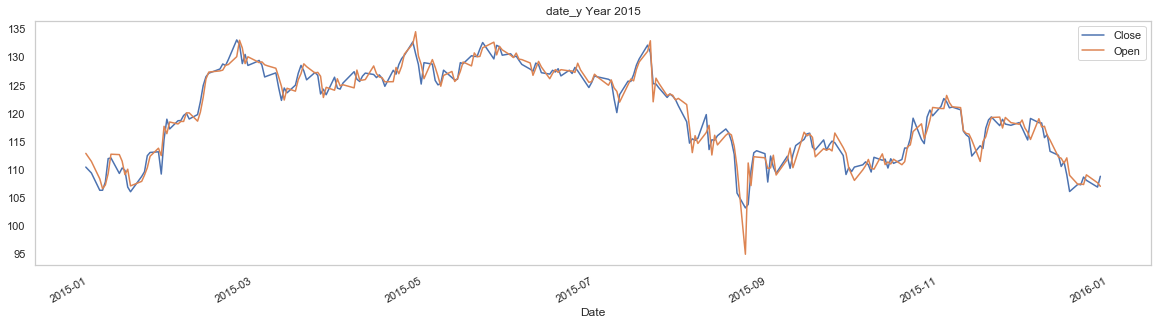

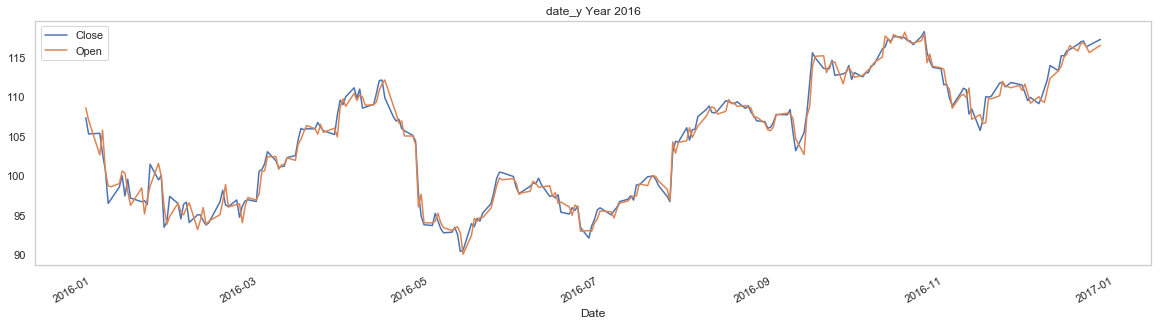

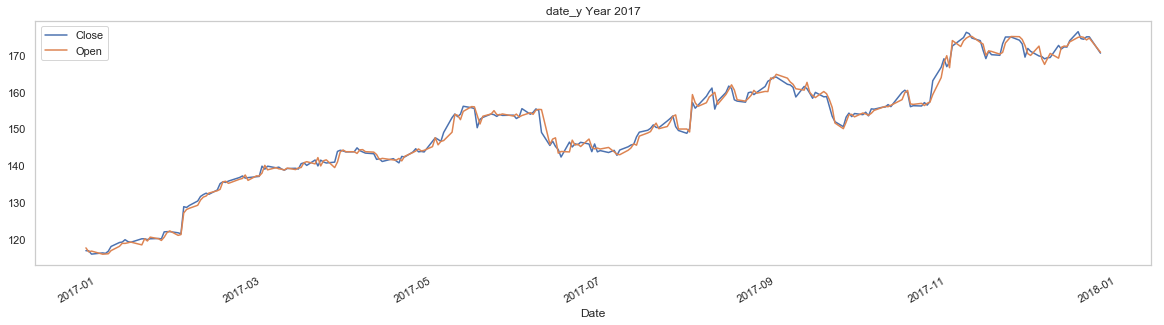

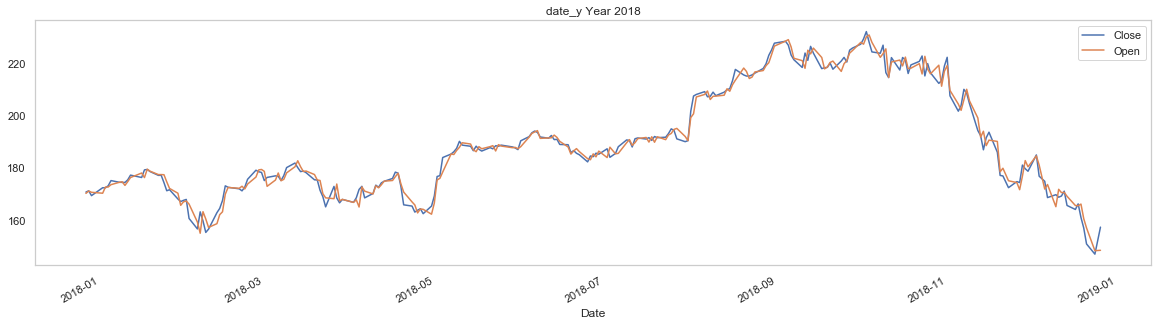

In [74]:
## Lets visualize the data...
# since we have few years data , so for detail analysis lets split it into years 2015-2018
AppleDsDetailedAnalysis = pd.DataFrame()
AppleDsDetailedAnalysis['Close'] = AppleDs.groupby('Date')['Close'].mean()
AppleDsDetailedAnalysis['Open'] = AppleDs.groupby('Date')['Open'].mean()
#AppleDsDetailedAnalysis['High'] = AppleDs.groupby('Date')['High'].mean()
#AppleDsDetailedAnalysis['Low'] = AppleDs.groupby('Date')['Low'].mean()
i = int(len(AppleDsDetailedAnalysis) / 4)
print(i)
fig, ax = plt.subplots(figsize=(15,7))
AppleDsDetailedAnalysis[:i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 2015',ax=ax)
AppleDsDetailedAnalysis[i:2*i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 2016')
AppleDsDetailedAnalysis[2*i:3*i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 2017')
AppleDsDetailedAnalysis[3*i:4*i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 2018')
## from year 2015-2018 the stock market is closing at higher price than it opens on though the margin profit is quiet low.

251


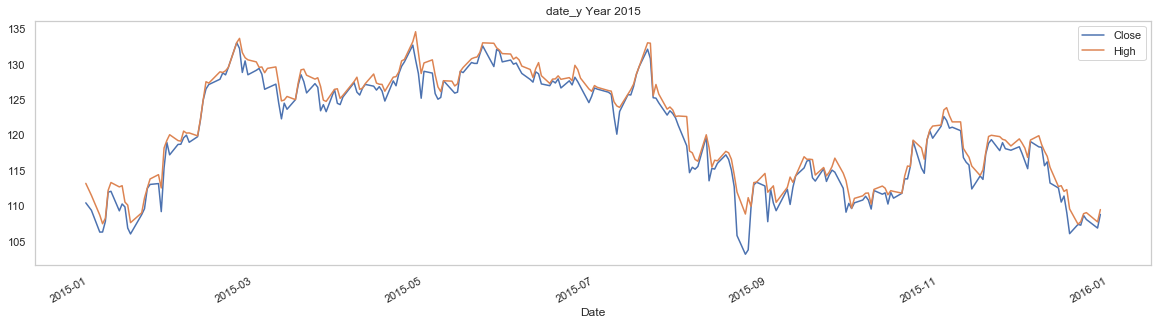

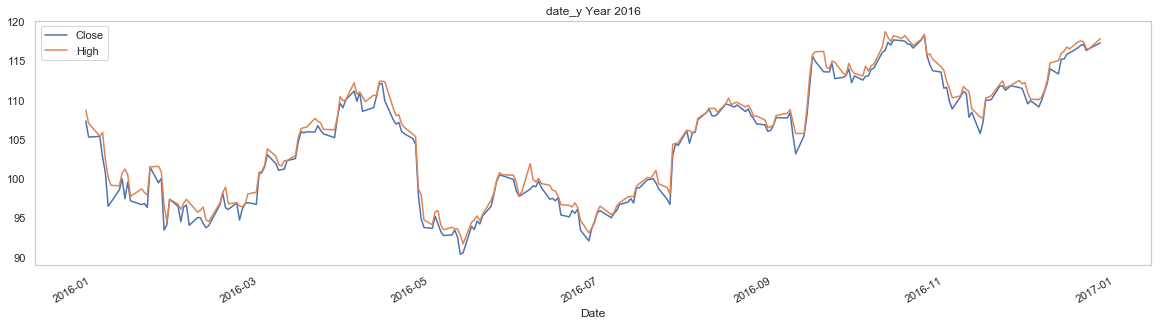

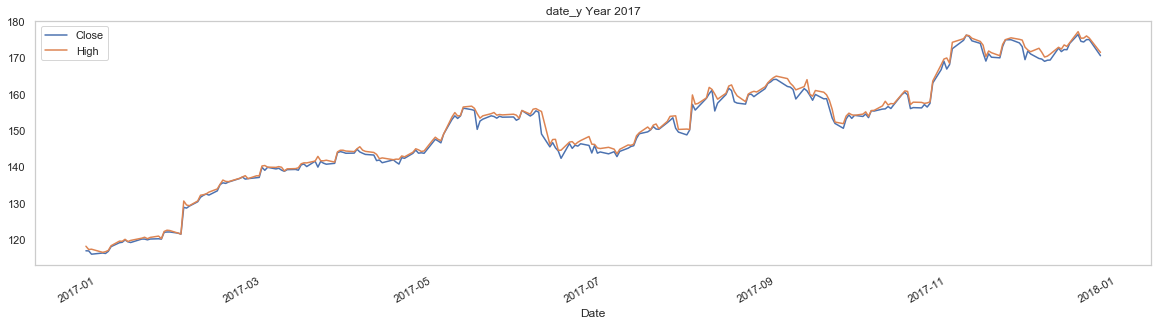

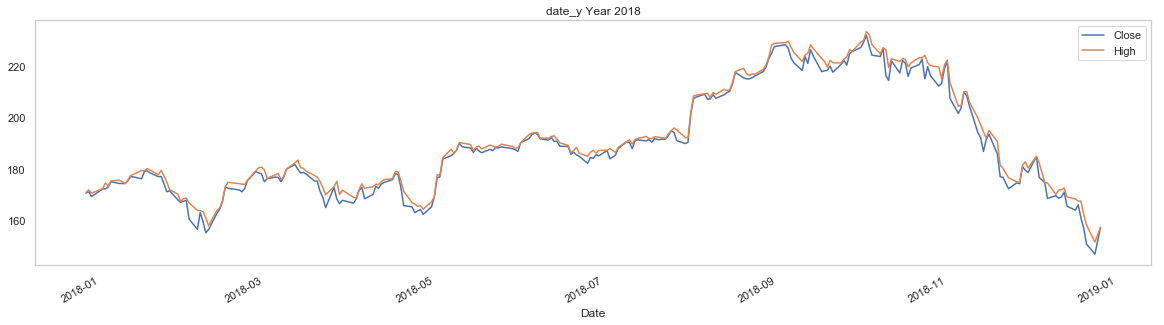

In [75]:
## Lets visualize the data...
# since we have few years data , so for detail analysis lets split it into years 2015-2018
AppleDsDetailedAnalysis = pd.DataFrame()
AppleDsDetailedAnalysis['Close'] = AppleDs.groupby('Date')['Close'].mean()
AppleDsDetailedAnalysis['High'] = AppleDs.groupby('Date')['High'].mean()
i = int(len(AppleDsDetailedAnalysis) / 4)
print(i)
fig, ax = plt.subplots(figsize=(15,7))
AppleDsDetailedAnalysis[:i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 2015',ax=ax)
AppleDsDetailedAnalysis[i:2*i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 2016')
AppleDsDetailedAnalysis[2*i:3*i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 2017')
AppleDsDetailedAnalysis[3*i:4*i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 2018')
## from year 2015-2018 the stock market is closing at comparatevily lesser value than the peak it reaches at that time.

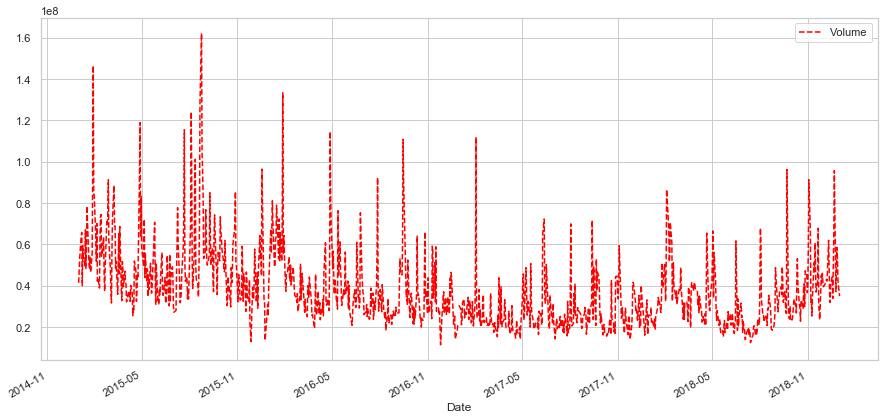

In [76]:
fig, ax = plt.subplots(figsize=(15,7))
AppleDsDetailedAnalysis = pd.DataFrame()
AppleDsDetailedAnalysis['Volume'] = AppleDs.groupby('Date')['Volume'].mean()
AppleDsDetailedAnalysis.plot(ax=ax,color='red', linestyle='dashed',
     markerfacecolor='red', markersize=12)
## distribution of Stocks purchased is quiet constant over time from 2015-2018

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


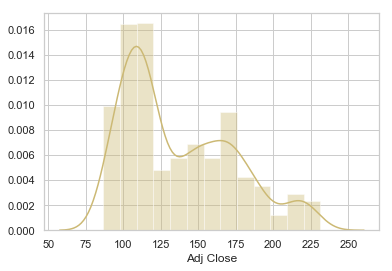

In [77]:
ax = sns.distplot(AppleDs["Adj Close"],color="y") ## Most the stock prices closed at a value of 100-125

In [78]:
### EDA on Apple stock data..

In [79]:
AppleDs.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,112.820000,113.129997,110.209999,110.379997,102.942894,41403400
1,2015-01-02,111.389999,111.440002,107.349998,109.330002,101.963631,53204600
2,2015-01-05,108.290001,108.650002,105.410004,106.250000,99.091148,64285500
3,2015-01-06,106.540001,107.430000,104.629997,106.260002,99.100471,65797100
4,2015-01-07,107.199997,108.199997,106.699997,107.750000,100.490089,40105900


In [80]:
## drop  for duplicate value
AppleDs.drop_duplicates(inplace=True,keep='first')

In [81]:
## check for null values..
AppleDs.apply(lambda x:sum(x.isnull().values),axis=0)    ## no missing values found...

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [82]:
## Lets round the values till 2 digits.
AppleDs=np.round(AppleDs,2)

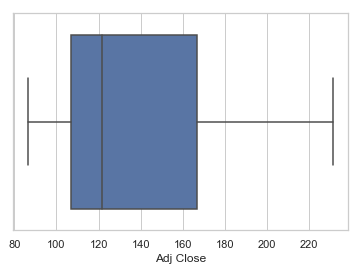

In [83]:
## visualize outliers..
sns.set(style="whitegrid")
ax = sns.boxplot(x=AppleDs["Adj Close"])  ## no outliers found for close tickets..

In [84]:
## lets find the corelation between variables in 

In [85]:
corr=AppleDs.drop('Date', 1).corr()  ## Extremely high corelation among prdictors..

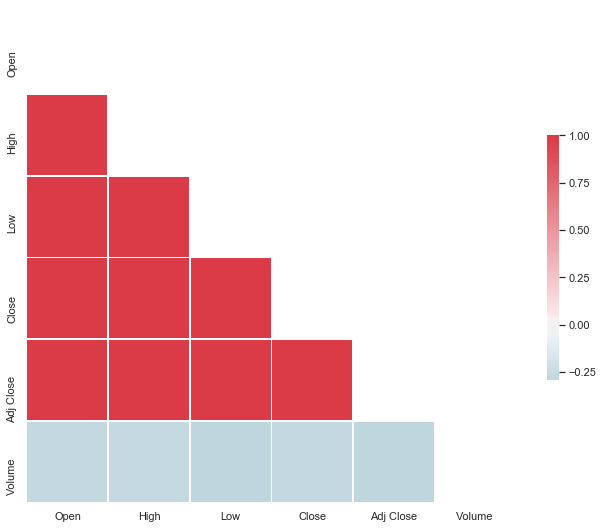

In [86]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [87]:
##### Model building..
## split the data into train and test data..
# X_train, X_test, y_train, y_test 
#    = train_test_split(X, y, test_size=0.2, random_state=1)
train_size = int(len(AppleDs) * 0.66)
test_size = int(len(AppleDs) * 0.88)
train, test,CV = AppleDs[0:train_size], AppleDs[train_size:test_size],AppleDs[test_size:len(AppleDs)]

In [88]:
train.shape

(664, 7)

In [89]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,112.82,113.13,110.21,110.38,102.94,41403400
1,2015-01-02,111.39,111.44,107.35,109.33,101.96,53204600
2,2015-01-05,108.29,108.65,105.41,106.25,99.09,64285500
3,2015-01-06,106.54,107.43,104.63,106.26,99.10,65797100
4,2015-01-07,107.20,108.20,106.70,107.75,100.49,40105900


In [90]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
fig_size
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 11
plt.rcParams["figure.figsize"] = fig_size

In [91]:
# Check stationarity of a timeseries..
#Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that 
#the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence
#levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series
#is stationary
# that it is not stationary (has some time-dependent structure). 
#The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.
# p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    plt.rcParams['agg.path.chunksize'] = 1000
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

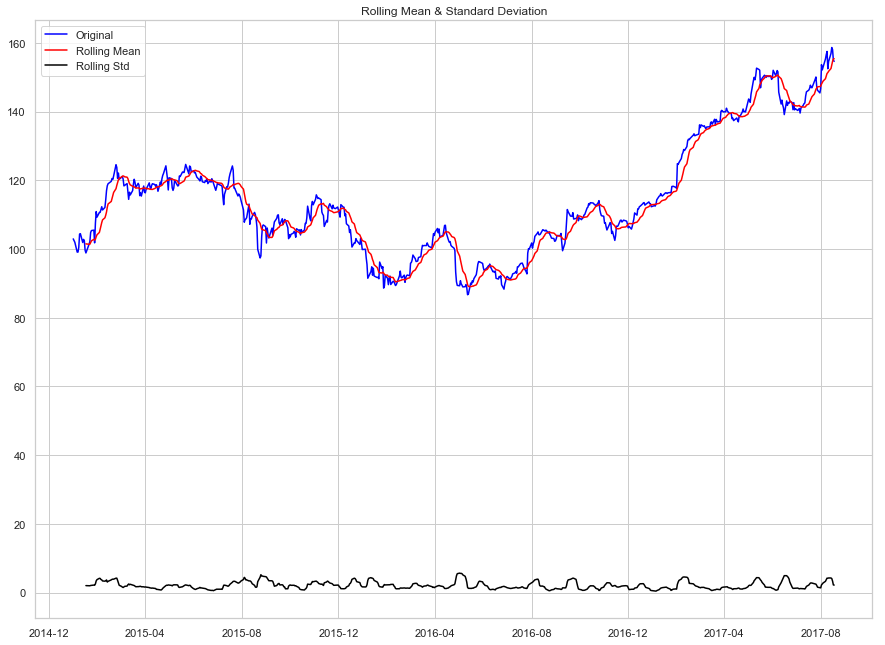

Results of Dickey-Fuller Test:
Test Statistic                  -0.207217
p-value                          0.937656
#Lags Used                       0.000000
Number of Observations Used    663.000000
Critical Value (1%)             -3.440252
Critical Value (5%)             -2.865909
Critical Value (10%)            -2.569097
dtype: float64


In [92]:
train.sort_index(inplace=True)
tsTrain=train.groupby(['Date'])["Adj Close"].mean()
tsTrain.dropna()
test_stationarity(tsTrain)


In [93]:
# as we see the p value > .05 Hense a/c to dickey fuller test, we cant Reject the null hypothesis (H0), the data have a unit root and is not stationary.
# Test Statistic > critical value  hense the data is not  stationary.
# basic idea is to model the trend and seasonality in this series, so we can remove it and make the series stationary.
#Then we can go ahead and apply statistical forecasting to the stationary series
## std dev is quiet low and mean is  incraesing .. hense the data is not  stationary
#### if the data is stationary. hense detrend and removing seasonality is not required...

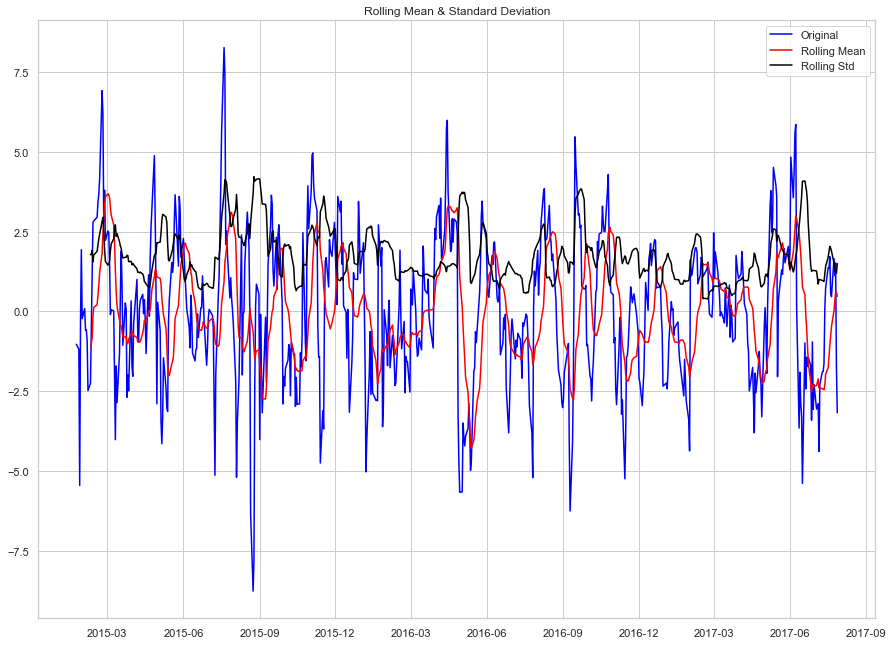

Results of Dickey-Fuller Test:
Test Statistic                -8.382561e+00
p-value                        2.487384e-13
#Lags Used                     9.000000e+00
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [94]:
# Decomposing:
#Here we model both the trend and the seasonality, then the remaining part of the time series is returned
from statsmodels.tsa.seasonal import seasonal_decompose
tsTrain.dropna(inplace=True)
decomposition=seasonal_decompose(tsTrain,freq=30)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
ts_decompose=residual
ts_decompose.dropna(inplace=True)
test_stationarity(ts_decompose)  ## the residual is stationary hense its can be considered as a noise,..

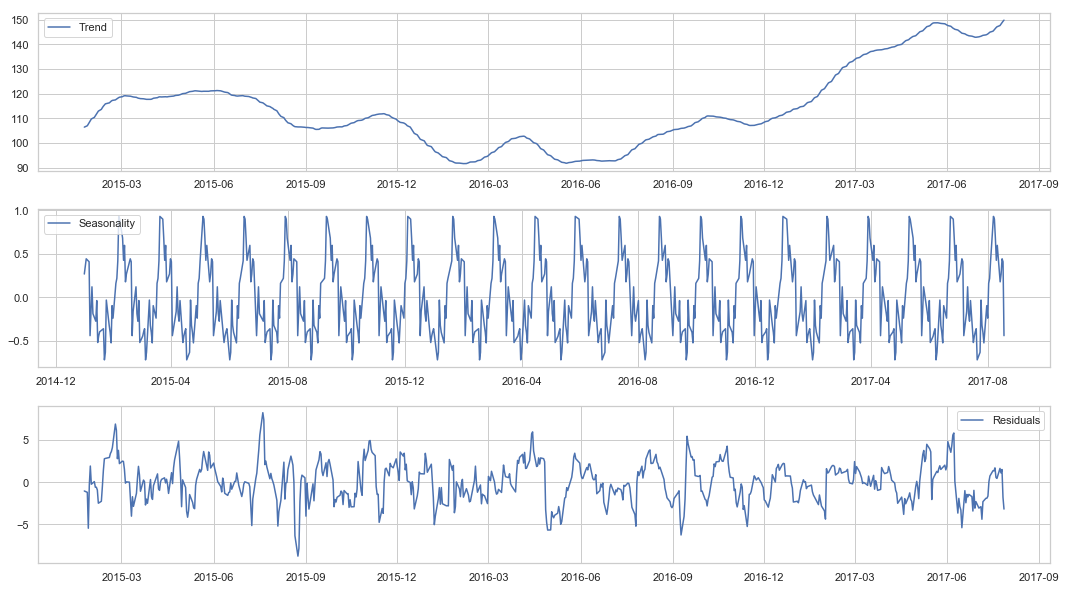

In [95]:
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()  
### we observe that there is an increasing trend in stock close prices and there is a seasonality observed over 4 years
# much noise is also observed in the series.

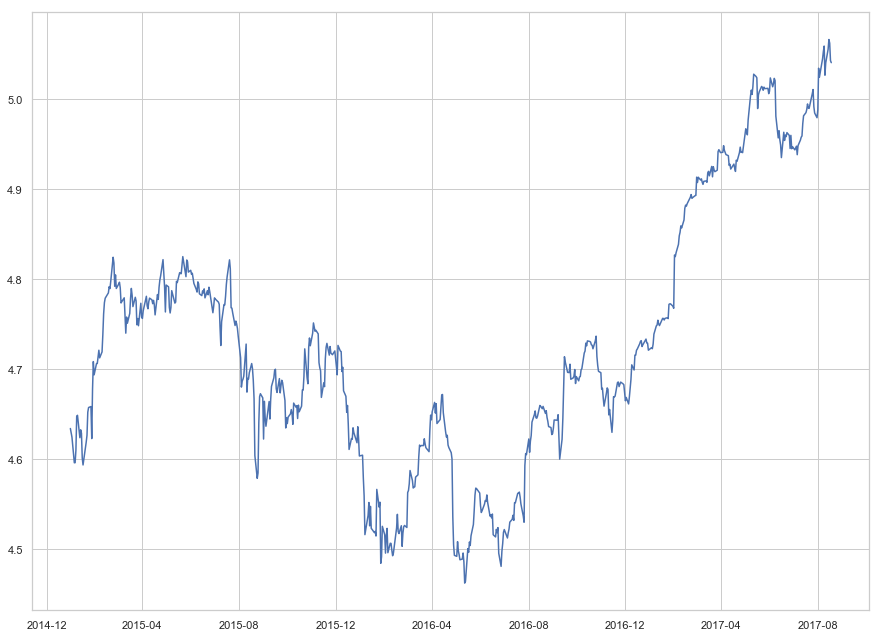

In [96]:
#### Detrend
#reduce the trend using transformation.These transformation can be log, sq-rt, cube root etc .
ts_log=np.log(tsTrain)
plt.plot(ts_log)

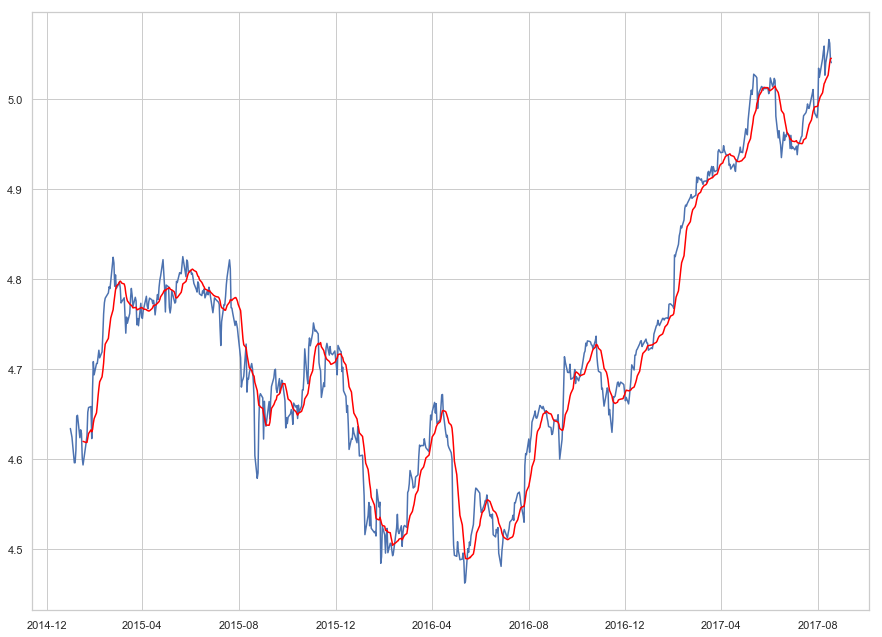

In [97]:
## much noise present , need to model the trend and remove from the series.
## Lets apply MA smoothning...
moving_avg=ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg,color="red")

## Lets subtract rolling mean form the original series and obtain the smoothened data.. 
ts_log_moving_avg_diff=ts_log-moving_avg

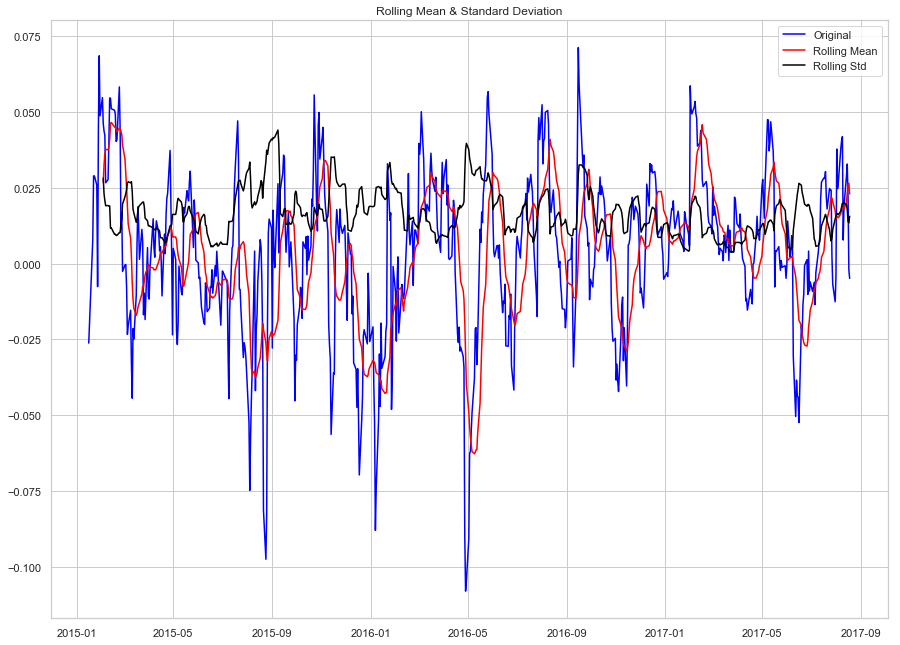

Results of Dickey-Fuller Test:
Test Statistic                -7.044733e+00
p-value                        5.725605e-10
#Lags Used                     1.000000e+00
Number of Observations Used    6.510000e+02
Critical Value (1%)           -3.440435e+00
Critical Value (5%)           -2.865990e+00
Critical Value (10%)          -2.569140e+00
dtype: float64


In [98]:
## Lets check after removing detrend, the series is stationary or not.
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

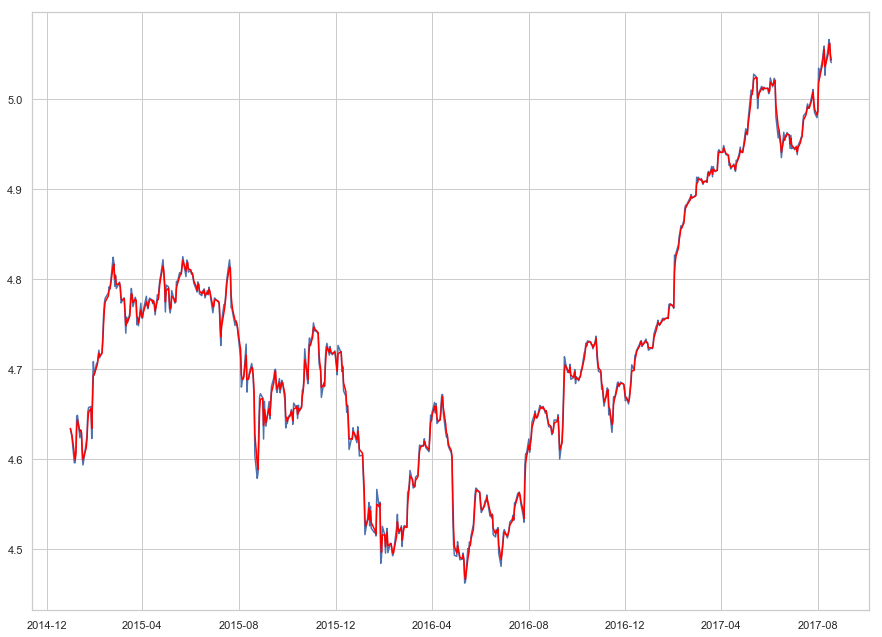

In [99]:
## exponnetial smoothning..
expwighted_avg=ts_log.ewm(com=0.5).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg,color='red')

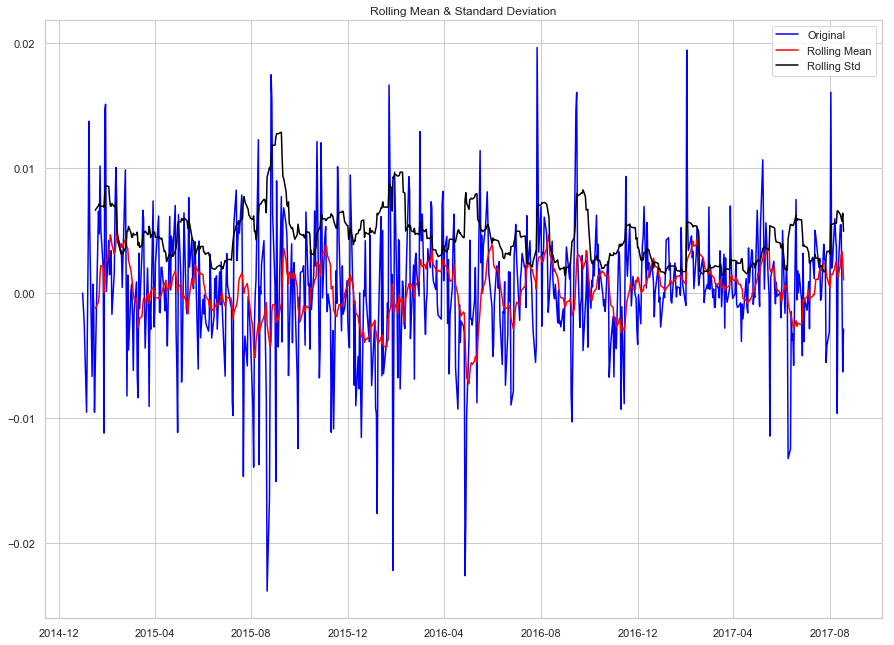

Results of Dickey-Fuller Test:
Test Statistic                -1.828823e+01
p-value                        2.300379e-30
#Lags Used                     0.000000e+00
Number of Observations Used    6.630000e+02
Critical Value (1%)           -3.440252e+00
Critical Value (5%)           -2.865909e+00
Critical Value (10%)          -2.569097e+00
dtype: float64


In [100]:
## Lets check the stationrity 
ts_log_ewma_diff=ts_log-expwighted_avg
test_stationarity(ts_log_ewma_diff)

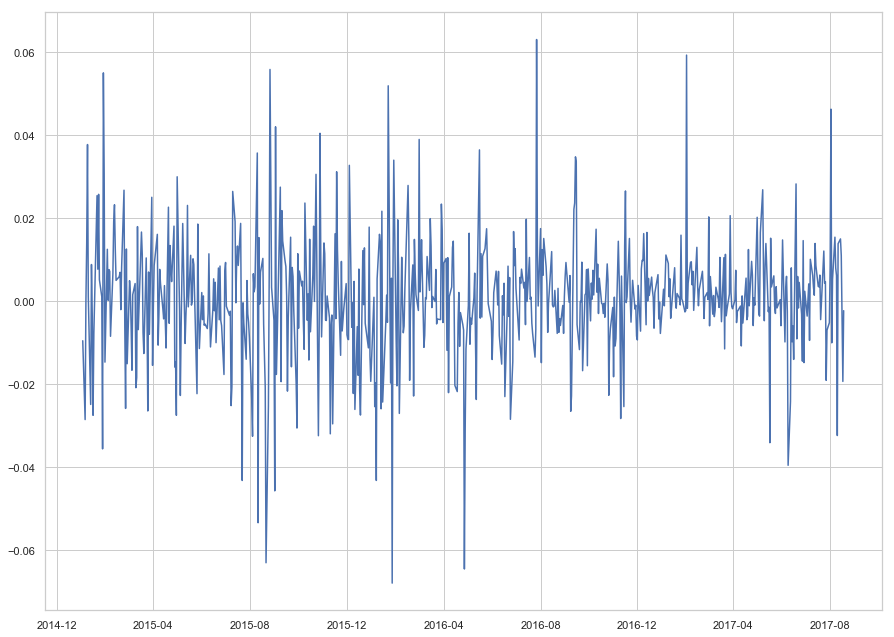

In [101]:
### Remove trend and series by differencing..
#Differencing
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

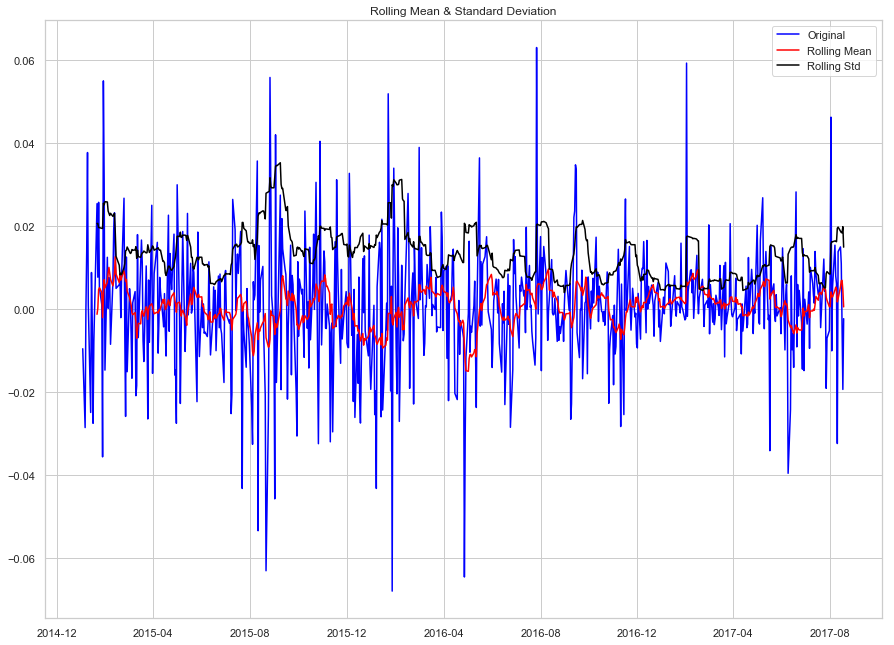

Results of Dickey-Fuller Test:
Test Statistic                 -25.300588
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    662.000000
Critical Value (1%)             -3.440267
Critical Value (5%)             -2.865916
Critical Value (10%)            -2.569100
dtype: float64


In [102]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

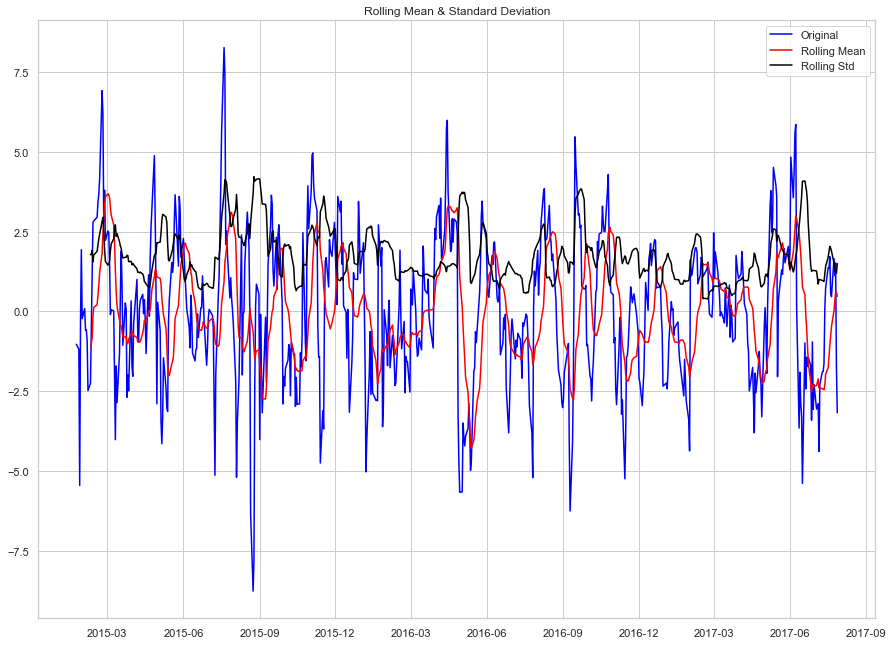

Results of Dickey-Fuller Test:
Test Statistic                -8.382561e+00
p-value                        2.487384e-13
#Lags Used                     9.000000e+00
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [103]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

 as we see the p value < .05 Hense a/c to dickey fuller test, we  Reject the null hypothesis (H0),hense  the data doesnt have a unit root and is  stationary.
 Test Statistic < critical value  hense the data is   stationary.
 std dev is quiet low and mean is not incraesing .. hense the data  not  stationary
#### if the data is stationary. hense now more detrend and removing seasonality is not required...

In [104]:
## Forcasting Timeseries.

### Forcasting timeseries
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf,pacf
## acf and pacf plots

In [105]:
lag_Acf=acf(ts_log_moving_avg_diff,nlags=20)
lag_Pacf=pacf(ts_log_moving_avg_diff,nlags=20,method='ols')

Text(0.5,1,'Autocorrelation Function')

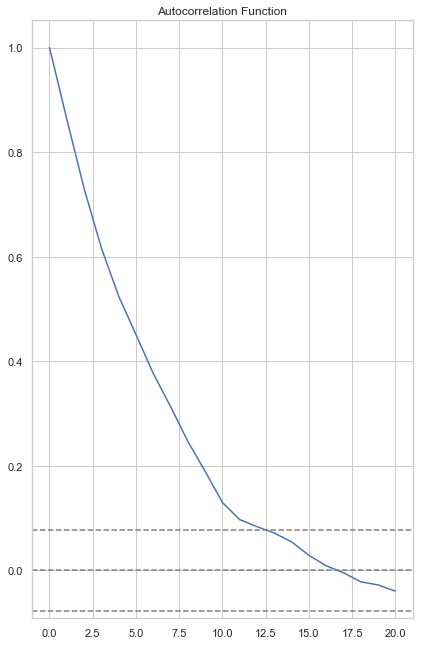

In [106]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_Acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

Text(0.5,1,'Autocorrelation Function')

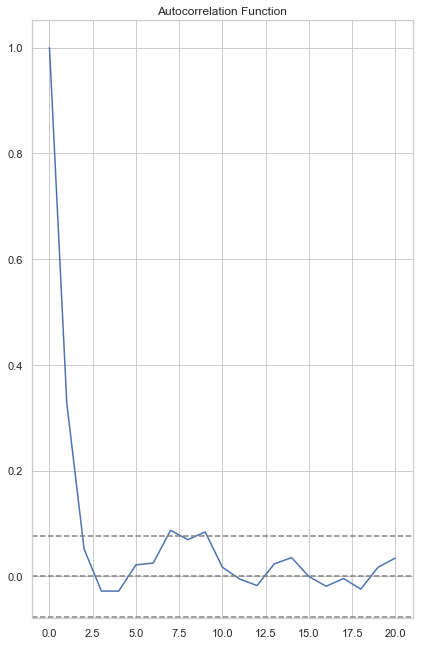

In [107]:
# ts_log_moving_avg_diff
lag_Acf=acf(ts_log_ewma_diff,nlags=20)
lag_Pacf=pacf(ts_log_ewma_diff,nlags=20,method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_Acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_ewma_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_ewma_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

Text(0.5,1,'Autocorrelation Function')

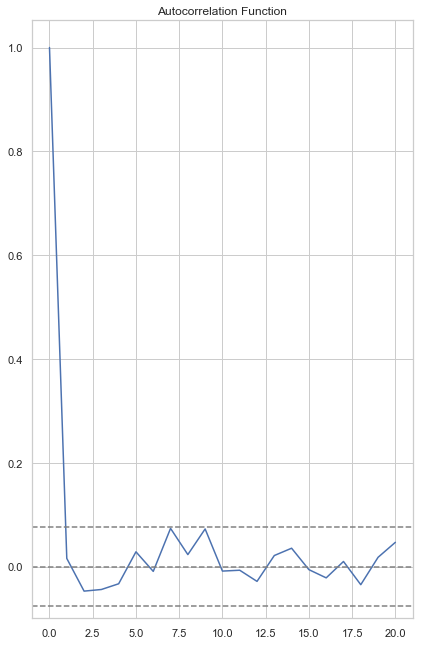

In [108]:
# ts_log_moving_avg_diff
lag_Acf=acf(ts_log_diff,nlags=20)
lag_Pacf=pacf(ts_log_diff,nlags=20,method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_Acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
### p=1

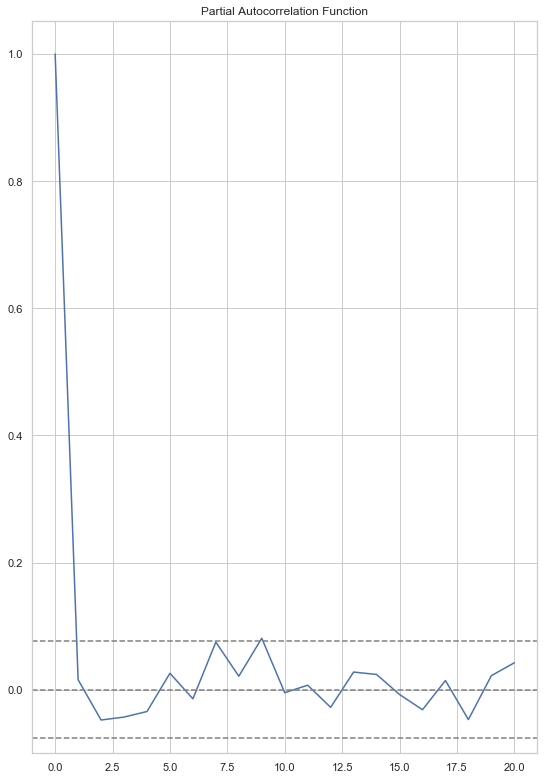

In [109]:
#Plot PACF: 
plt.subplot(122)
plt.plot(lag_Pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
## q=2

Text(0.5,1,'Autocorrelation Function')

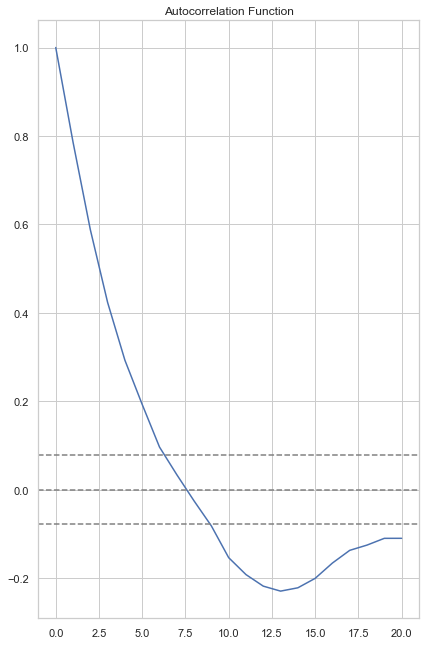

In [110]:
# ts_log_moving_avg_diff
lag_Acf=acf(ts_log_decompose,nlags=20)
lag_Pacf=pacf(ts_log_decompose,nlags=20,method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_Acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_decompose)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_decompose)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [111]:
from statsmodels.tsa.arima_model import ARIMA
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\s

Text(0.5,1,'RSS: 0.1460')

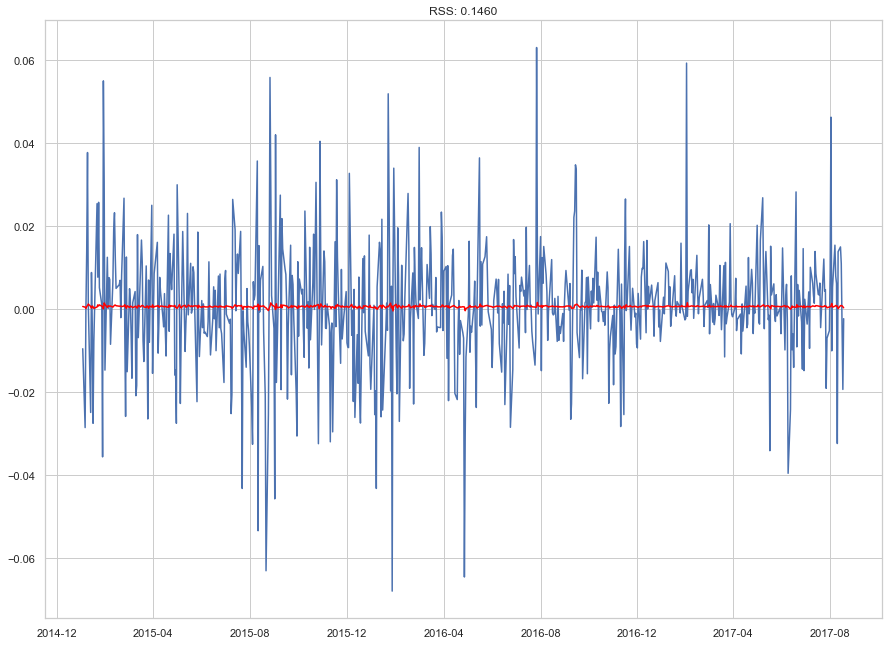

In [112]:
## AR model
model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))


In [113]:
mean_absolute_percentage_error(ts_log_diff,results_AR.fittedvalues)

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


inf

In [114]:
np.mean(np.abs((ts_log_diff - results_AR.fittedvalues) / ts_log_diff)) * 100

inf

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: 0.1457')

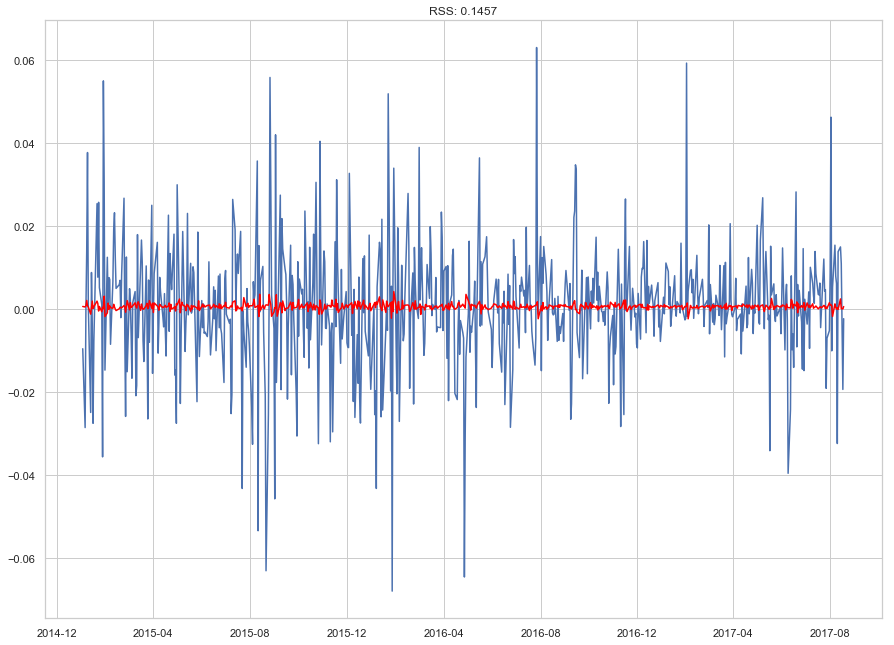

In [115]:
## MA model
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params)

Text(0.5,1,'RSS: 0.1444')

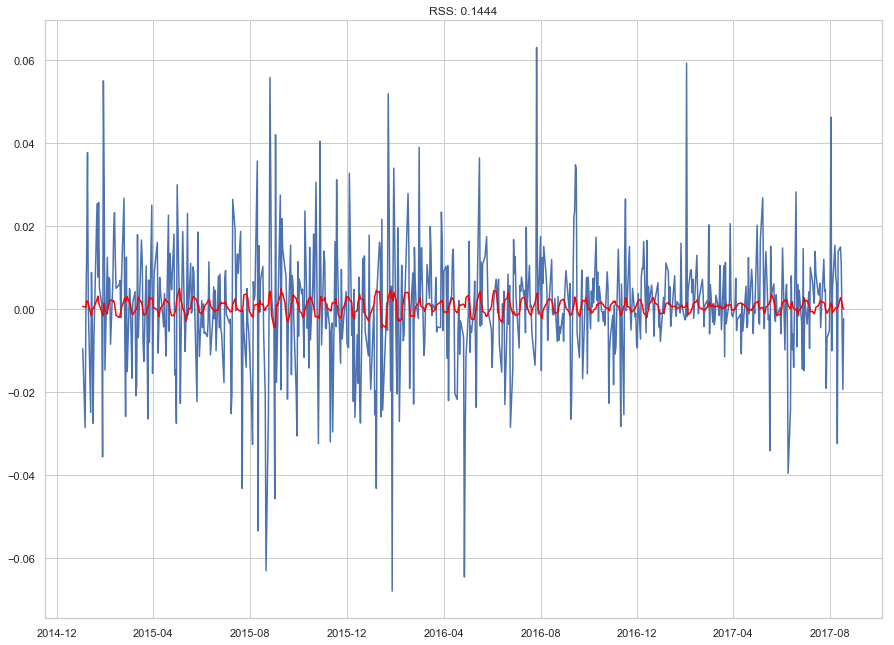

In [116]:
## Combined Model generates Arima..
model = ARIMA(ts_log, order=(3, 1, 2))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))


In [117]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
2015-01-02    0.000617
2015-01-05    0.000459
2015-01-06    0.000508
2015-01-07    0.001949
2015-01-08    0.001943
dtype: float64

In [118]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
2015-01-02    0.000617
2015-01-05    0.001076
2015-01-06    0.001583
2015-01-07    0.003532
2015-01-08    0.005476
dtype: float64

In [119]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2014-12-31    4.634146
2015-01-02    4.634764
2015-01-05    4.635222
2015-01-06    4.635730
2015-01-07    4.637679
dtype: float64

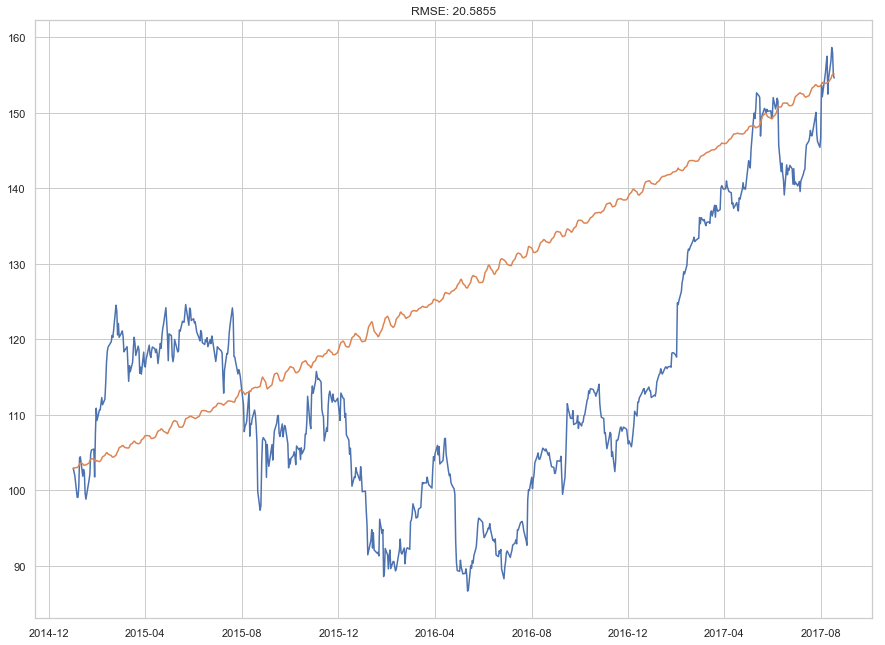

In [120]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(tsTrain)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-tsTrain)**2)/len(tsTrain)))
tsTrain["Predicted value"]=predictions_ARIMA

In [121]:
## Lets test the model on test data..
import datetime
tsTest=test.groupby(['Date'])["Adj Close"].mean()
#pd.to_datetime(AppleDs.Date,format='%Y-%m-%d')
#startdate=datetime.date('2017-08-21',format='%Y-%m-%d')
#endDate=datetime.date('2018-07-09',format='%Y-%m-%d')
#forecastTest = results_ARIMA.predict(startdate,endDate)
startindex=len(tsTrain)
endindex=startindex+224

#from pandas import datetime
#startdate = "2017-08-21" # The date - 29 Dec 2017
#format_str = '%Y-%m-%d' # The format
#start_index = datetime(2017, 8, 21)
#end_index = datetime(2018, 7, 9)
#startdate1 = datetime.datetime.strptime(startdate, format_str)
#endDate = "2018-07-09" #
#endDate1 = datetime.datetime.strptime(endDate, format_str)
#forecastTest = results_ARIMA.predict(start=startdate,end=endDate)

## 

#from pandas import datetime
#start_index = datetime(1990, 12, 25)
#end_index = datetime(1990, 12, 26)
forecastTest = results_ARIMA.predict(start=startindex-1, end=endindex)
#tsTest["Forcasted value"]=forecastTest

###
#forecastTest=results_ARIMA.forecast()
#tsTest["Forcasted value"]=forecastTest

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [122]:
forcasted_ARIMA_diff = pd.Series(forecastTest, copy=True)
forcasted_ARIMA_diff.head()

663    0.000642
664    0.000543
665    0.000338
666    0.000214
667    0.000202
dtype: float64

In [123]:
forcasted_ARIMA_diff_cumsum = forcasted_ARIMA_diff.cumsum()
forcasted_ARIMA_diff_cumsum.head()

663    0.000642
664    0.001184
665    0.001522
666    0.001736
667    0.001938
dtype: float64

In [124]:
forcasted_ARIMA_log = pd.Series(tsTest.ix[0], index=tsTest.index)
forcasted_ARIMA_log = forcasted_ARIMA_log.add(forcasted_ARIMA_diff_cumsum,fill_value=0)
forcasted_ARIMA_log.head()

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


2017-08-21    154.33
2017-08-22    154.33
2017-08-23    154.33
2017-08-24    154.33
2017-08-25    154.33
dtype: float64

In [125]:
#plt.plot(tsTest[''])
#plt.plot(forcasted_ARIMA_log)

In [126]:
##3 Linear regression..
##### Model building..
train_size = int(len(AppleDs) * 0.66)
test_size = int(len(AppleDs) * 0.88)
train, test,CV = AppleDs[0:train_size], AppleDs[train_size:test_size],AppleDs[test_size:len(AppleDs)]
x_train=train.drop('Adj Close',axis=1)
y_train=train['Adj Close']
x_test=test.drop('Adj Close',axis=1)
y_test=test['Adj Close']

In [127]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train.drop('Date',axis=1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [128]:
## Results..
#make predictions and find the rmse
preds = model.predict(x_test.drop('Date',axis=1))
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms
### Rms is lower than previous technique.. Liner regrssion has performed well in this case...

2.749361364355921

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


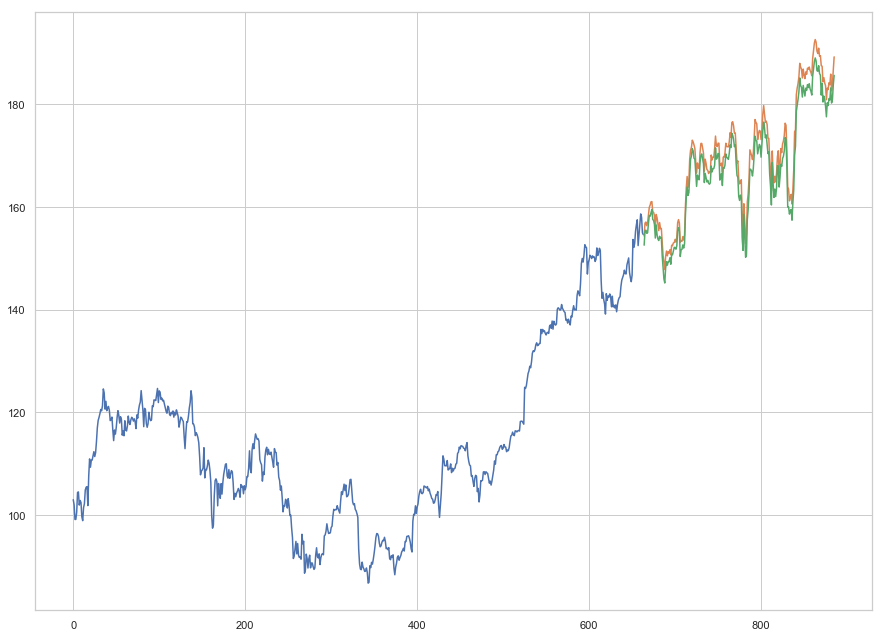

In [129]:
test['Predictions']=0
test['Predictions']=preds
train.index = AppleDs[0:train_size].index
test.index = AppleDs[train_size:test_size].index

plt.plot(train['Adj Close'])
plt.plot(test[['Adj Close', 'Predictions']])

In [130]:
##  k-Nearest Neighbours
train_size = int(len(AppleDs) * 0.66)
test_size = int(len(AppleDs) * 0.88)
train, test,CV = AppleDs[0:train_size], AppleDs[train_size:test_size],AppleDs[test_size:len(AppleDs)]
x_train=train.drop('Adj Close',axis=1)
y_train=train['Adj Close']
x_test=test.drop('Adj Close',axis=1)
y_test=test['Adj Close']

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [132]:
#fit the model and make predictions
model.fit(x_train.drop('Date',axis=1),y_train)
predsknn = model.predict(x_test.drop('Date',axis=1))

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [133]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predsknn)),2)))
rms
### Rms is little higher as comapared to 

51.915878467193004

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


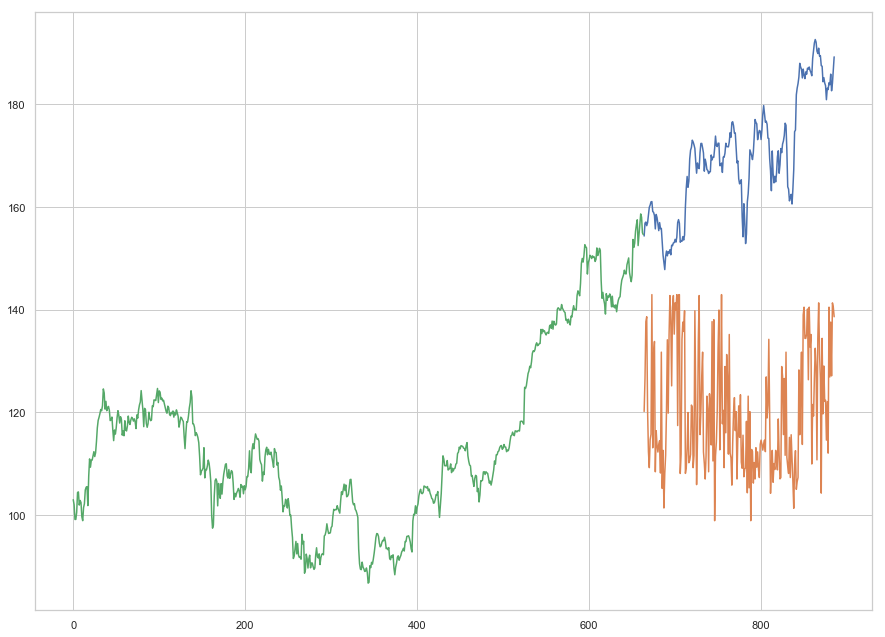

In [134]:
#plot
test['Predictions'] = 0
test['Predictionsknn'] = predsknn
plt.plot(test[['Adj Close', 'Predictionsknn']])
plt.plot(train['Adj Close'])

In [136]:
###Prophet
#Prophet, designed and pioneered by Facebook, is a time series forecasting library that requires no data preprocessing and is extremely simple to implement. The input for Prophet is a dataframe with two columns: date and target (ds and y).
#importing prophet
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

train_size = int(len(AppleDs) * 0.66)
test_size = int(len(AppleDs) * 0.88)
train, test,CV = AppleDs[0:train_size], AppleDs[train_size:test_size],AppleDs[test_size:len(AppleDs)]
x_train=train.drop('Adj Close',axis=1)
y_train=train['Adj Close']
x_test=test.drop('Adj Close',axis=1)
y_test=test['Adj Close']

train.head()
## creating daatframe...
#creating dataframe
new_data = pd.DataFrame(index=range(0,len(AppleDs)),columns=['Date', 'Adj Close'])

for i in range(0,len(AppleDs)):
    new_data['Date'][i] = AppleDs['Date'][i]
    new_data['Adj Close'][i] = AppleDs['Adj Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

#preparing data
new_data.rename(columns={'Adj Close': 'y', 'Date': 'ds'}, inplace=True)

#train and validation
#train and validation
train = new_data[:987]
valid = new_data[987:]
# train, test,CV = AppleDs[0:train_size], AppleDs[train_size:test_size],AppleDs[test_size:len(AppleDs)]

In [137]:
AppleDs.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,112.82,113.13,110.21,110.38,102.94,41403400
1,2015-01-02,111.39,111.44,107.35,109.33,101.96,53204600
2,2015-01-05,108.29,108.65,105.41,106.25,99.09,64285500
3,2015-01-06,106.54,107.43,104.63,106.26,99.10,65797100
4,2015-01-07,107.20,108.20,106.70,107.75,100.49,40105900


In [138]:
# Importing datasets
import pandas as pd
import numpy as np
from fbprophet import Prophet

train=AppleDs[:800]
test=AppleDs[800:]
# Convert to datetime format
train['Date'] = pd.to_datetime(train.Date,format='%Y-%m-%d') 
test['Date'] = pd.to_datetime(test.Date,format='%Y-%m-%d')

ModuleNotFoundError: No module named 'fbprophet'

In [139]:
# convert to time series from dataframe
train.index = train.Date
train=train[['Date','Adj Close']]

daily_train = train.resample('D').sum()

In [140]:
daily_train.head()

,Adj Close
Date,
2014-12-31,102.94
2015-01-01,0.00
2015-01-02,101.96
2015-01-03,0.00
2015-01-04,0.00


In [141]:
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train['Adj Close']
daily_train.drop(['Adj Close'],axis = 1, inplace = True)

In [142]:
#fit the model
model = Prophet()
model.fit(daily_train)

NameError: name 'Prophet' is not defined

In [143]:
#predictions
close_prices = model.make_future_dataframe(periods=len(test))
forecast = model.predict(close_prices)

AttributeError: 'GridSearchCV' object has no attribute 'make_future_dataframe'

In [144]:
close_prices

NameError: name 'close_prices' is not defined

In [145]:
forecast

NameError: name 'forecast' is not defined

In [146]:
#rmse
forecast_valid = forecast['yhat'][987:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

NameError: name 'forecast' is not defined

In [147]:
#### LSTM
from sklearn.preprocessing import MinMaxScaler

train_size = int(len(AppleDs) * 0.66)
test_size = int(len(AppleDs) * 0.88)
train, test,CV = AppleDs[0:train_size], AppleDs[train_size:test_size],AppleDs[test_size:len(AppleDs)]
x_train=train.drop('Adj Close',axis=1)
y_train=train['Adj Close']
x_test=test.drop('Adj Close',axis=1)
y_test=test['Adj Close']

In [148]:
#creating dataframe
data = AppleDs.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(AppleDs)),columns=['Date', 'Adj Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Adj Close'][i] = data['Adj Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
test = dataset[987:,:]

In [149]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [150]:
# create and fit the LSTM network
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))


Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
#inputs = AppleDs[len(AppleDs) - len(test) - 60:].values
#inputs = inputs.reshape(-1,1)
#inputs  = scaler.transform(inputs)

In [ ]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [151]:
rms=np.sqrt(np.mean(np.power((test-closing_price),2)))
rms

NameError: name 'closing_price' is not defined

In [152]:
#for plotting
train = new_data[:987]
test = new_data[987:]
test['Predictions'] = closing_price
plt.plot(train['Adj Close'])
plt.plot(test[['Adj Close','Predictions']])

NameError: name 'closing_price' is not defined

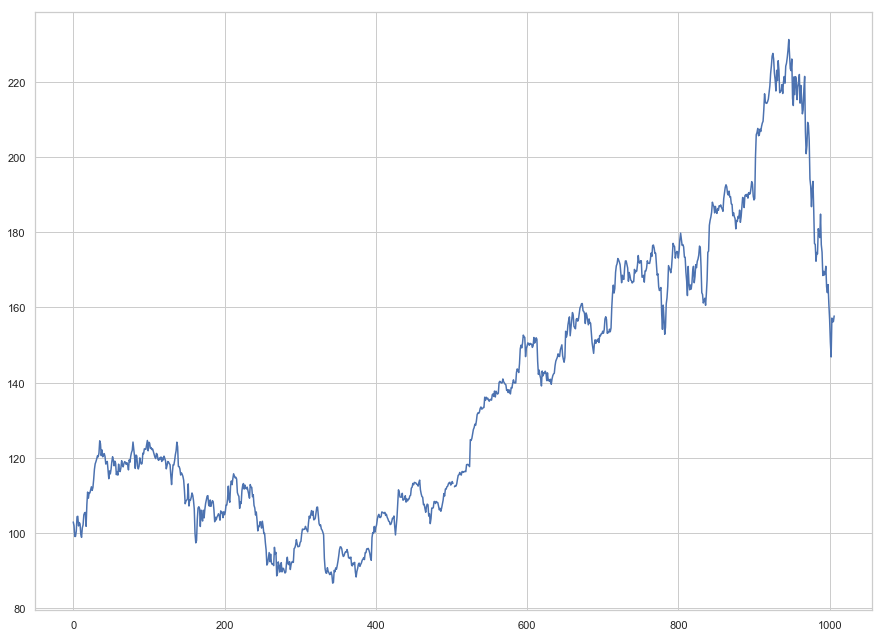

In [153]:
## GARCH

# create a simple white noise with increasing variance
from random import gauss
from random import seed
from matplotlib import pyplot

pyplot.plot(AppleDs['Adj Close'])
pyplot.show()


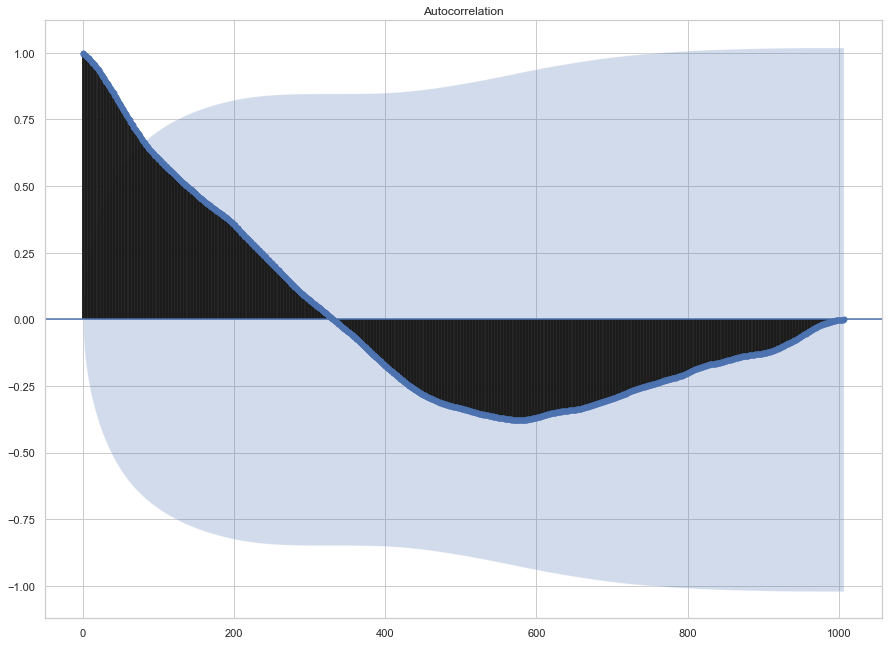

In [154]:
from random import gauss
from random import seed
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

# square the dataset
#squared_data = [x**2 for x in AppleDs['Adj Close'][0:40]]
squared_data = [x**2 for x in AppleDs['Adj Close']]
# create acf plot
plot_acf(squared_data)
#pyplot.xticks(np.arange(min(AppleDs['Adj Close']), max(AppleDs['Adj Close'])+1, 1.0))
pyplot.show()
## touching confidence interval...... @4

In [155]:
# split into train/test
n_test = 700
train, test = AppleDs[:-n_test], AppleDs[-n_test:]

You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


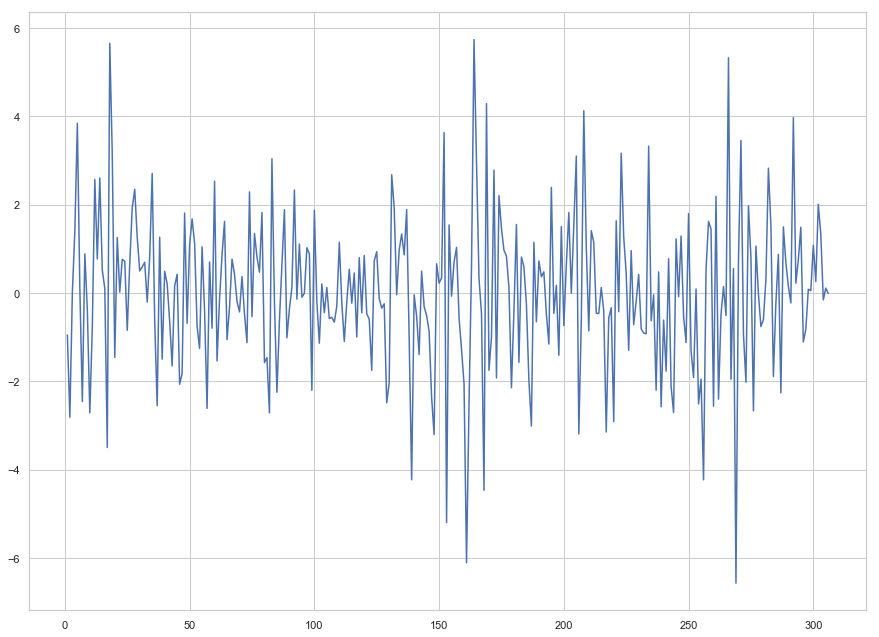

In [156]:
# define model
!pip install arch
from arch.univariate import arch_model
#model = arch_model(train.drop('Date',axis=1),mean='zero', p=1, o=1, q=1,power=1.0)
#  mean='zero', p=1, o=1, q=1,power=1.0
returns=100*train['Adj Close'].pct_change().dropna()
returns.plot()
plt.show()
#model = arch_model(returns)
# x_test.drop('Date',axis=1)

In [157]:
#am = arch_model(returns)
#am = arch_model(returns, mean='AR', lags=2, vol='harch', p=[1, 5, 22])
#am = arch_model(returns, mean='zero', p=1, o=1, q=1, power=1.0, dist='StudentsT')
am=arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')

In [158]:
# fit model
model_fit = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 593.7726942026071
Iteration:      2,   Func. Count:     14,   Neg. LLF: 593.7223303168837
Iteration:      3,   Func. Count:     21,   Neg. LLF: 593.6211190322676
Iteration:      4,   Func. Count:     28,   Neg. LLF: 593.3616559727027
Iteration:      5,   Func. Count:     36,   Neg. LLF: 593.3438819617259
Iteration:      6,   Func. Count:     43,   Neg. LLF: 593.2315554055585
Iteration:      7,   Func. Count:     50,   Neg. LLF: 593.1570598676467
Iteration:      8,   Func. Count:     56,   Neg. LLF: 593.1249984838728
Iteration:      9,   Func. Count:     62,   Neg. LLF: 593.0934733065073
Iteration:     10,   Func. Count:     68,   Neg. LLF: 593.0898892810703
Iteration:     11,   Func. Count:     74,   Neg. LLF: 593.087746871456
Iteration:     12,   Func. Count:     80,   Neg. LLF: 593.0876566085469
Iteration:     13,   Func. Count:     86,   Neg. LLF: 593.0876552076768
Optimization terminated successfully.    (Exit mode 0)
          

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


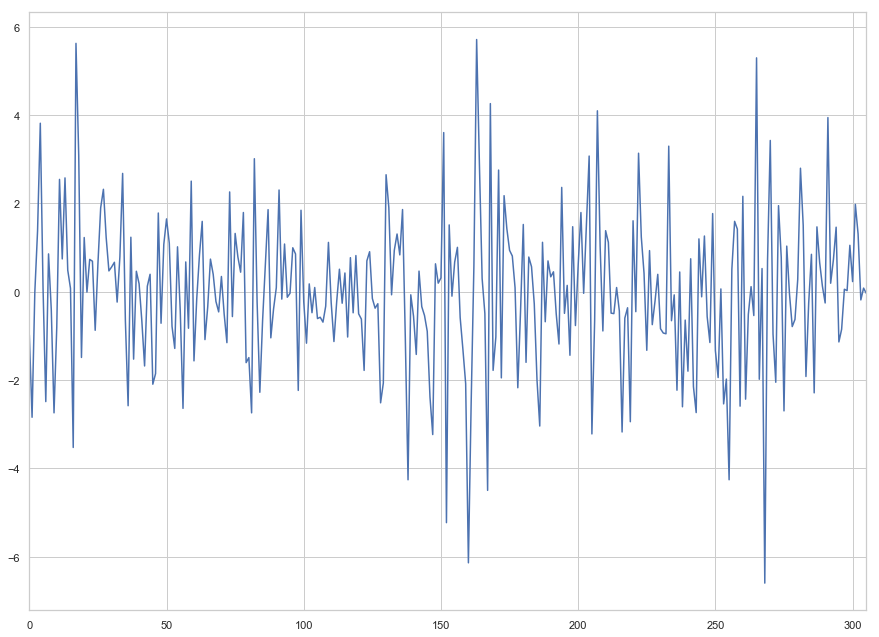

In [159]:
import seaborn
seaborn.tsplot(model_fit.resid)

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


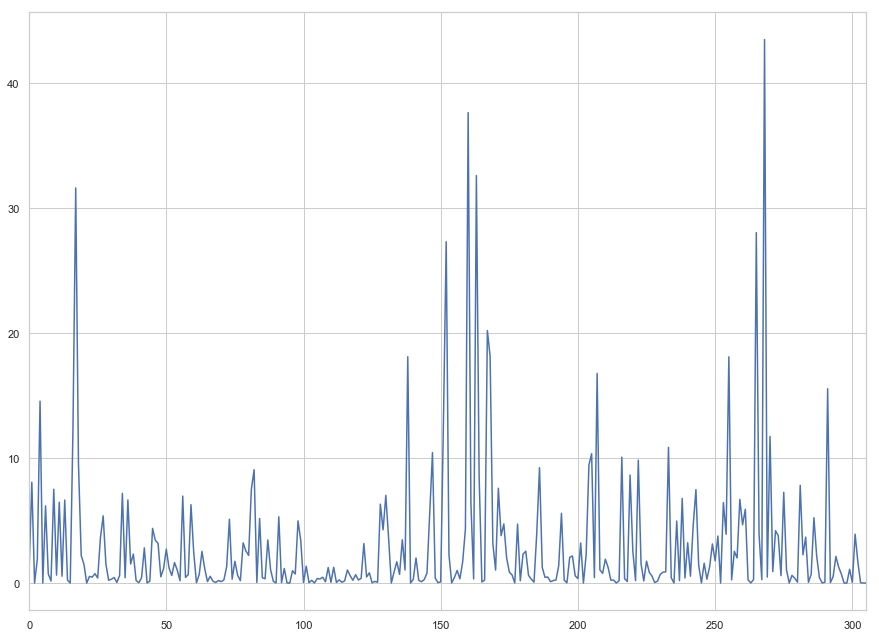

In [160]:
seaborn.tsplot(model_fit.resid**2)

In [161]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              Adj Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -593.088
Distribution:                  Normal   AIC:                           1194.18
Method:            Maximum Likelihood   BIC:                           1209.07
                                        No. Observations:                  306
Date:                Mon, Feb 25 2019   Df Residuals:                      302
Time:                        14:12:27   Df Model:                            4
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0257  8.970e-02      0.286      0.775 [ -0.150,  0.201]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1433  9.406e-02      1.523      0.128 [-4.108e-02,  0.328]
alpha[1]       0.0994  4.281e-02      2.321  2.028e-02  [1.546e-02,  0.183]
beta[1]        0.8536  4.018e-02     21.245 3.635e-100    [  0.775,  0.932]
===========================================================================

Covariance estimator: robust
"""

In [162]:
# forecast the test set
yhat = model_fit.forecast(horizon=30, method='simulation')
sims = yhat.simulations

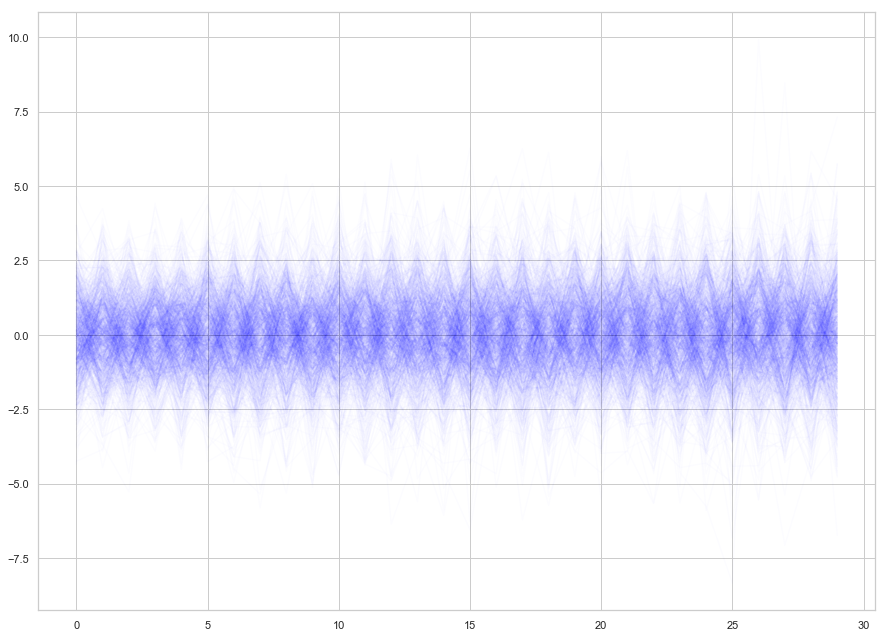

In [163]:
# plot the actual variance
lines = plt.plot(sims.values[-1,:,:].T, color='blue', alpha=0.01)
lines[0].set_label('Simulated paths')
plt.show()

-2.767694167200729


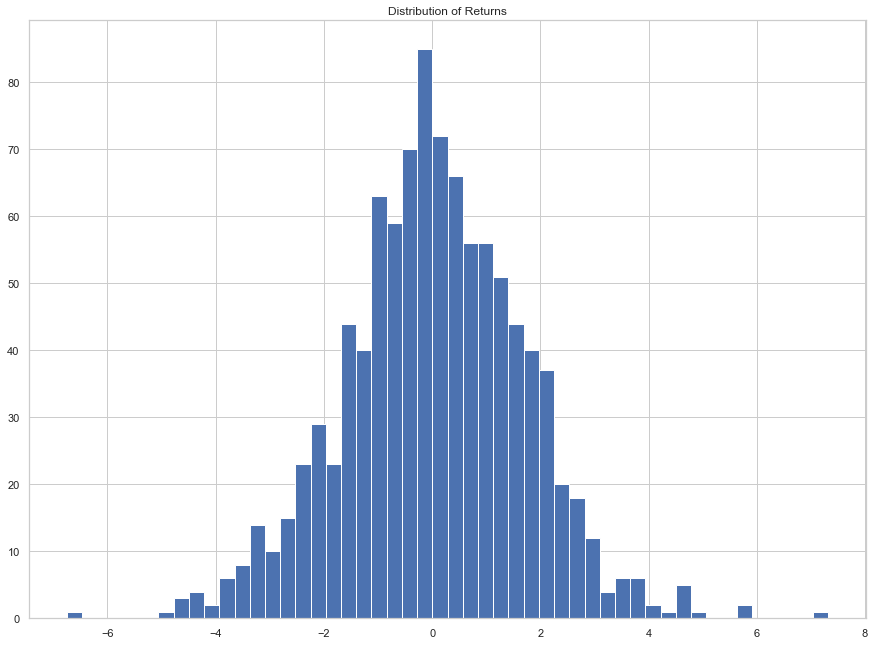

In [164]:
print(np.percentile(sims.values[-1,:,-1].T,5))
plt.hist(sims.values[-1, :,-1],bins=50)
plt.title('Distribution of Returns')
plt.show()

In [216]:
##  VAR model..
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR
import math
from sklearn.metrics import mean_squared_error

AppleDsVar=AppleDs
AppleDsVar['Date'] = pd.to_datetime(AppleDsVar.Date , format = '%d/%m/%Y %H.%M.%S')
AppleDsVar.index = AppleDsVar.Date
AppleDsVar = AppleDsVar.drop(['Date'], axis=1)
cols=AppleDsVar.columns

In [218]:
# split into train/test
n_test = 700
train, test = AppleDsVar[:-int(n_test)], AppleDsVar[-int(n_test):]
model = VAR(endog=train)
model_fit = model.fit()
# np.asarray(train)
# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(test))

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [220]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 700 entries, 2016-03-22 to 2018-12-31
Data columns (total 6 columns):
Open         700 non-null float64
High         700 non-null float64
Low          700 non-null float64
Close        700 non-null float64
Adj Close    700 non-null float64
Volume       700 non-null int64
dtypes: float64(5), int64(1)
memory usage: 38.3 KB


In [225]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,5):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ',round(math.sqrt(mean_squared_error(pred[i], test[i])),4))

rmse value for Open is :  79.2785
rmse value for High is :  79.5007
rmse value for Low is :  78.8898
rmse value for Close is :  79.0606
rmse value for Adj Close is :  79.188


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [233]:
#make final predictions
model = VAR(train)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[1.05965876e+02 1.07004604e+02 1.04629911e+02 1.05732975e+02
  1.00839304e+02 4.01400084e+07]]


C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [238]:
train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,112.82,113.13,110.21,110.38,102.94,41403400
2015-01-02,111.39,111.44,107.35,109.33,101.96,53204600
2015-01-05,108.29,108.65,105.41,106.25,99.09,64285500
2015-01-06,106.54,107.43,104.63,106.26,99.10,65797100
2015-01-07,107.20,108.20,106.70,107.75,100.49,40105900


In [247]:
import statsmodels.api as sm
exog = train[['Open','High','Low']]
mod = sm.tsa.VARMAX(train[['Adj Close','Close']], order=(2,0), trend='nc', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


                             Statespace Model Results                             
Dep. Variable:     ['Adj Close', 'Close']   No. Observations:                  307
Model:                            VARX(2)   Log Likelihood               -1540.925
Date:                    Mon, 25 Feb 2019   AIC                           3115.850
Time:                            15:26:38   BIC                           3179.206
Sample:                                 0   HQIC                          3141.185
                                    - 307                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                29.76, 31.40   Jarque-Bera (JB):       13.74, 3192.86
Prob(Q):                        0.88, 0.83   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.01, 0.99   Skew:                      -0.28, 0.68
Prob(H) (two-sided):            0.97, 0.98   Kurtosis:                  3.87, 18.74


C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


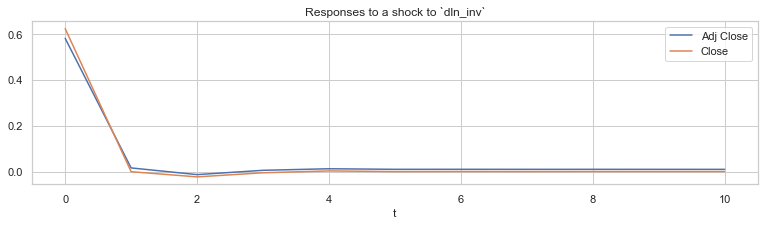

In [248]:
ax = res.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `dln_inv`');

In [253]:
## VARMAX
from statsmodels.tsa.statespace.varmax import VARMAX
# fit model
model = VARMAX(train, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast(model_fit.y,steps=1)
print(yhat)

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\s

LinAlgError: 6-th leading minor of the array is not positive definite

In [254]:
train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,112.82,113.13,110.21,110.38,102.94,41403400
2015-01-02,111.39,111.44,107.35,109.33,101.96,53204600
2015-01-05,108.29,108.65,105.41,106.25,99.09,64285500
2015-01-06,106.54,107.43,104.63,106.26,99.10,65797100
2015-01-07,107.20,108.20,106.70,107.75,100.49,40105900


In [252]:
mod = sm.tsa.VARMAX(train[['Adj Close','Close']], order=(1,1))
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


                             Statespace Model Results                             
Dep. Variable:     ['Adj Close', 'Close']   No. Observations:                  307
Model:                         VARMA(1,1)   Log Likelihood                -228.857
                              + intercept   AIC                            483.714
Date:                    Mon, 25 Feb 2019   BIC                            532.163
Time:                            15:29:29   HQIC                           503.088
Sample:                                 0                                         
                                    - 307                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                 25.86, 6.10   Jarque-Bera (JB):      18.85, 32822.35
Prob(Q):                        0.96, 1.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.07, 1.00   Skew:                     -0.30, -6.72
P